# Прогноз оттока клиентов для сети фитнес-центров 

### Задача: 
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;

### Цель:
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - выделить целевые группы клиентов;
    - предложить меры по снижению оттока;
    - определить другие особенности взаимодействия с клиентами.
    
Для анализа использованы данные пользователей за предыдущий до проверки факта оттока месяц. 

### План работы над проектом
- [Описание данных](#step1);
- [Импорт и проверка данных](#step2); 
- [Исследовательский анализ данных (EDA)](#step3);
- [Модель прогнозирования оттока пользователей](#step4);
- [Кластеризация пользователей](#step5);
- [Общие выводы и рекомендации](#step6).

<div id='step2'/>

## Импорт и проверка данных:

In [1]:
# Импортируем библиотеки:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gym = pd.read_csv('gym_churn.csv')

In [3]:
def standart_opening(data):
    data.info()
    print('--------------------------------------')
    print('Дубликаты:')
    print (data.duplicated().sum(), 'дубликатов')
    print('--------------------------------------')
    print('Пропуски:')
    print (data.isna().mean())
    print('--------------------------------------')
    print('Начало таблицы')
    print (data.head())
    print('--------------------------------------')
    print('Конец таблицы')
    print (data.tail())

standart_opening(gym)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# Приведем названия солбцов к нижнему регистру:
gym.columns = [col.lower() for col in gym.columns]
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Я убедилась в том, что в данных нет пропусков, привела названия колонок к нижнему регистру. На этом с предобработкой - все, можно приступать к анализу данных. 

<div id='step3'/>

## Исследовательский анализ данных (EDA)

Изучим датасет: есть ли в нем отсутствующие признаки, каковые средние значения и стандартные отклонения.

In [5]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В признаках есть много бинарных значений, но часть признаков количественная. Поэтому в общем средние значения признаков сильно  различаются. Возможно, данные нужно будет стандартизировать. 

Портрет среднестатистического пользователя на основании средних значений и стандартных отклонений:

Женщина или мужчина (практически в равных долях), проживающие или работающие в районе, где расположен клуб, с 50% вероятностью являются сотрудниками компании-партнера клуба. Как правило оставляют свой номер телефона, покупают абонемент на 1 месяц (указываю по медиане. Среднее 4.68, но у нас есть хвост на годовой абонемент, поэтму считаю это значение не очень показательным), в 40% случаев посещают групповые тренировки. Возраст - 29 лет, средние траты на допуслуги - 136-146. Количество месяцев до окончания тренировки - 1, лайфтайм - 3 месяца. Количество посещений в неделю (общее) - 1,8 раза, за последний месяц - 1,7 раза. 

Треть клиентов пришли по реферальной программе. Отток - 26.5%.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [6]:
gym.groupby('churn').mean().reset_index()

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По получившимся средним значениям кажется, будто у пользователей со значением `'churn' == 1`они ниже, чем у тех, чей `'churn' == 0`.

Построим графики для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).
Используем гистограммы и графики распределения признаков.

In [7]:
churn_data_0 = gym.query('churn == 0')
churn_data_1 = gym.query('churn == 1')

Я создала два массива данных, разделенных по ключевому признаку `'churn'`: пользователи, которые оттекли, и те, которые остались. 
Построим гистограммы по признакам группы `'churn == 0'`:

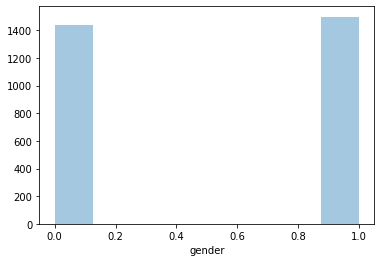

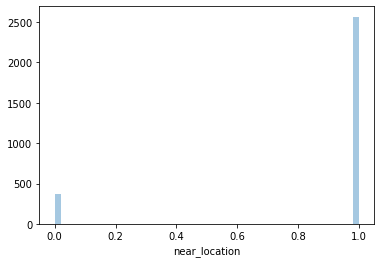

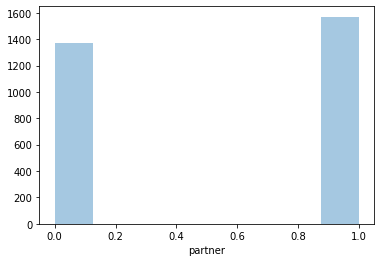

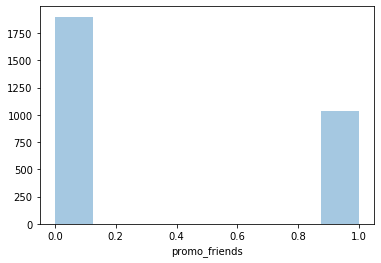

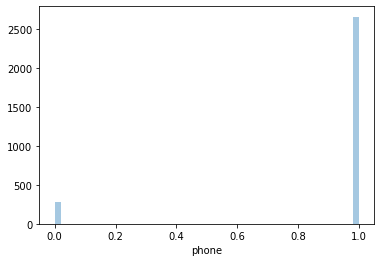

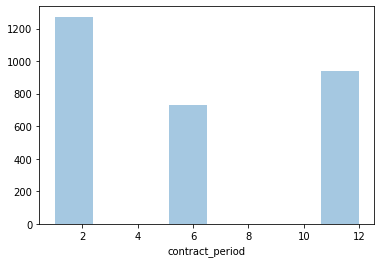

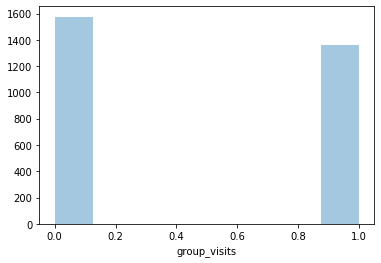

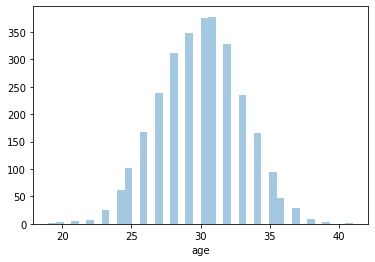

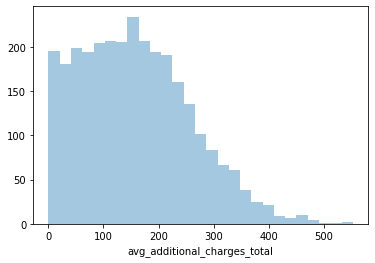

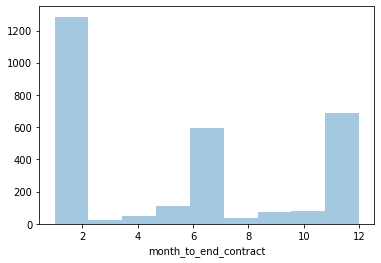

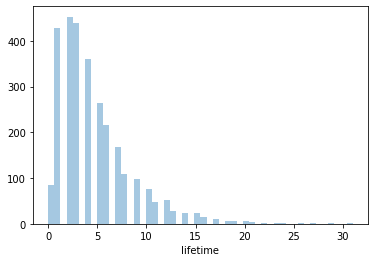

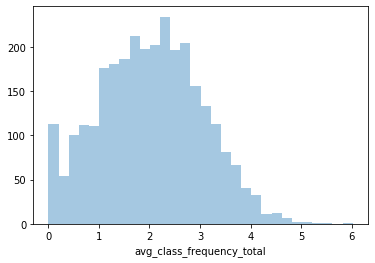

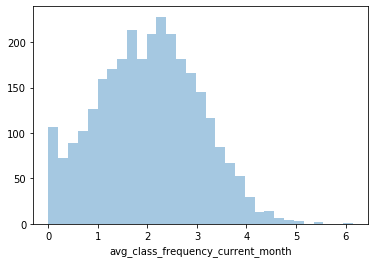

In [8]:
for col in churn_data_0.drop('churn', axis = 1).columns:
    sns.distplot(churn_data_0[col], kde = False)
    plt.show()

Аналогично построим гистограммы по признакам группы `'churn == 1'`:

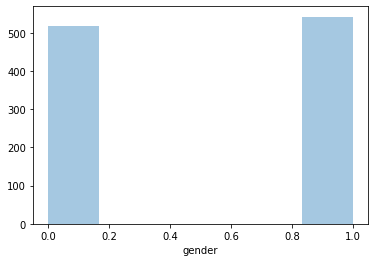

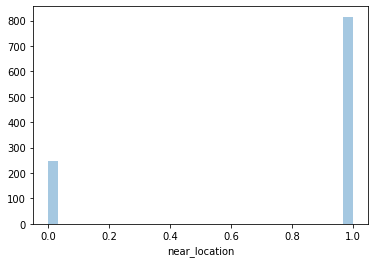

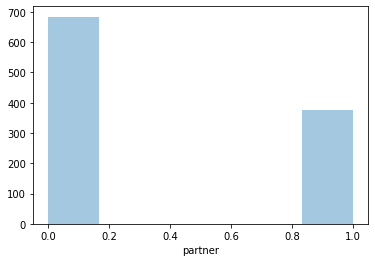

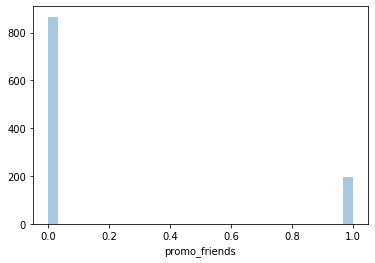

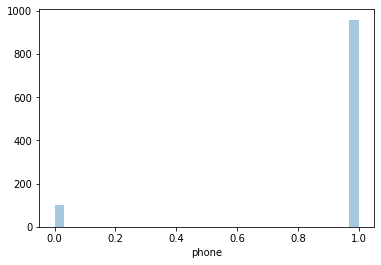

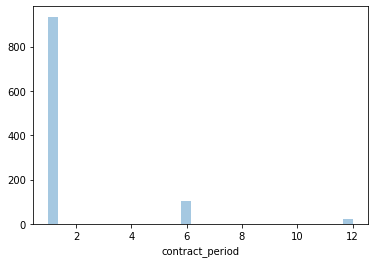

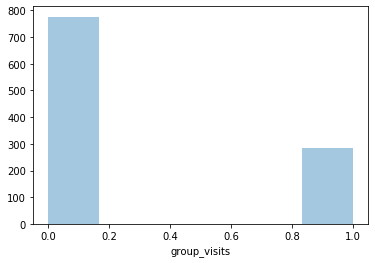

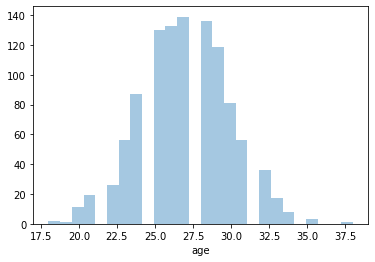

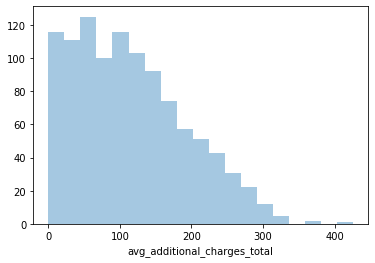

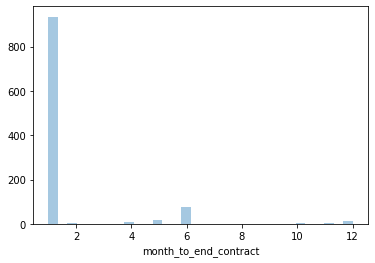

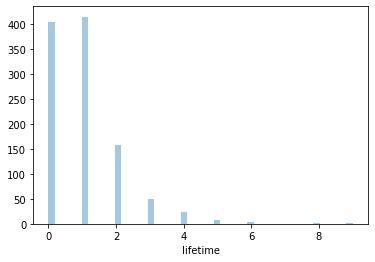

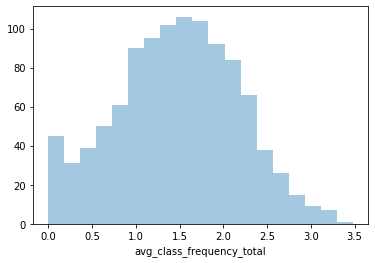

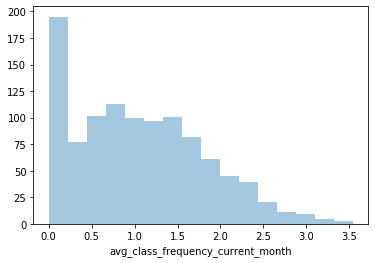

In [9]:
for col in churn_data_1.drop('churn', axis = 1).columns:
    sns.distplot(churn_data_1[col], kde = False)
    plt.show()

Исходя из графиков, видно, что самые большие различия между группами видны в таких признаках, как `'contract_period'`, `'group_visits'`, `'avg_additional_charges_total'`, `'month_to_end_contract'`, `'lifetime'`, `'avg_class_frequency_total'`, `'avg_class_frequency_current_month'`. То есть чаще всего оттекают те, кто покупает короткие абонементы, является новым клиентом; те кто вообще ходит раз через раз и особенно халтурили в текущем месяце и те, кто редко посещает групповые занятия. 

Теперь посмотрим на графки распределения по признакам для всех данных по исходной таблице `gym`:

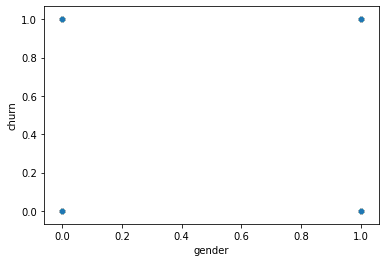

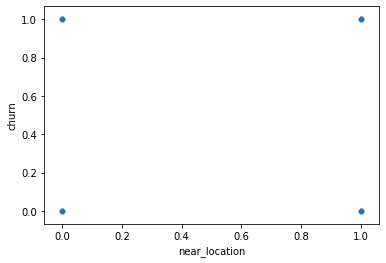

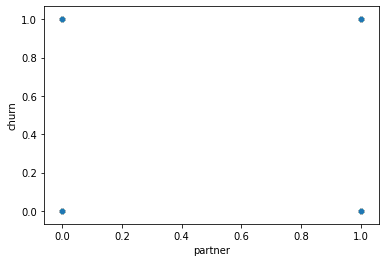

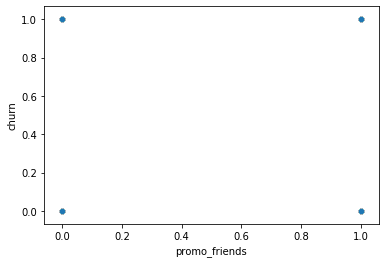

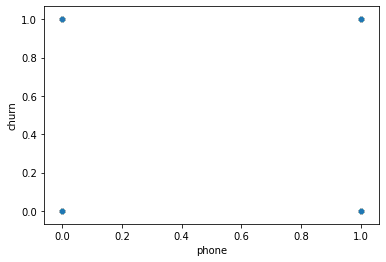

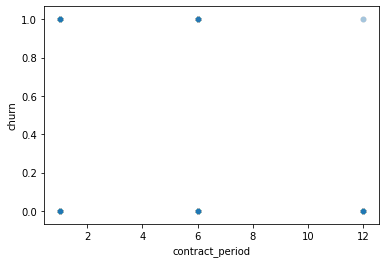

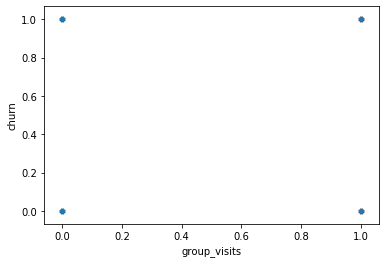

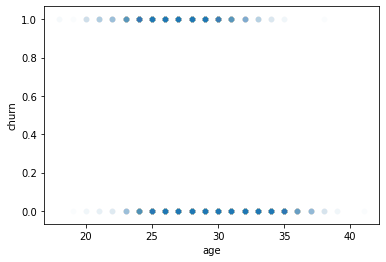

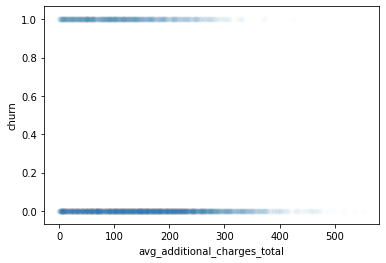

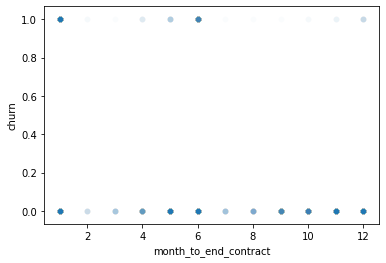

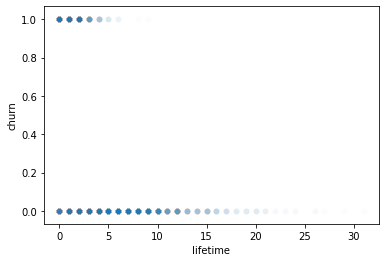

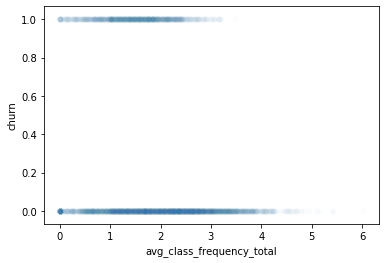

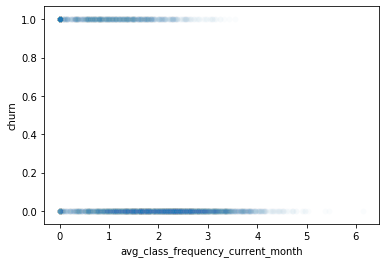

In [10]:
for col in gym.drop('churn', axis = 1).columns:
    sns.scatterplot(gym[col], gym['churn'], alpha=0.02)
    plt.show()

На графиках распределения видно, что наши группы различаются по возрасту: `'churn == 1'` это 25-30, `'churn == 0'` - 25-35. В нулевой группе больше абонементов длительностью от 6, 10, 12 месяцев, а в другой - на 1 и 6 месяцев. `'lifetime'` для `'churn == 1'` почти не превышает 3х месяцев, в `'churn == 0'` этот показатель уверенно доходит до 10 месяцев и выше.
Кроме того группы сильно отличаются по посещению и сумме дополнительных расходов. Те, кто отваливается, ходят и платят значительно меньше. 

Построим матрицу корреляций и тепловую карту:

In [11]:
gym_corr = gym.corr()

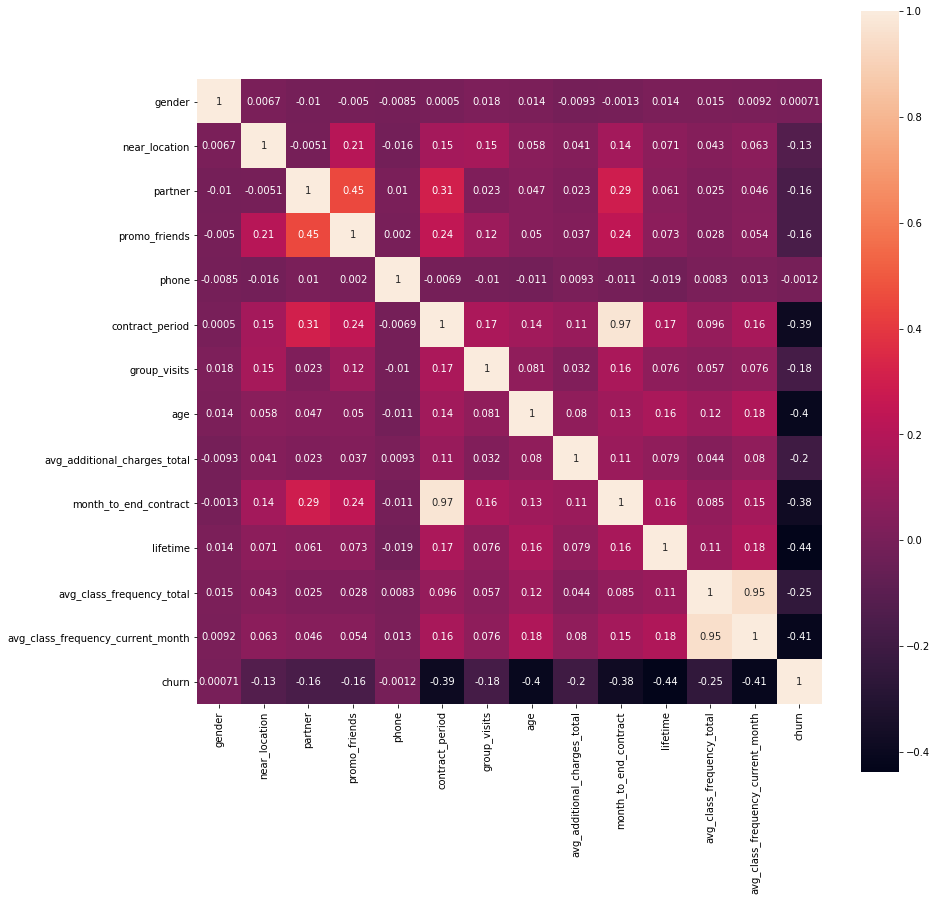

In [12]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(gym_corr, annot = True, square=True)
plt.show();

На тепловой карте видно, что есть несколько признаков чрезмерно сильно коррелирующих друг с другом - это `'contract_period'` и `'month_to_end_contract'`, `'avg_class_frequency_current_month'` и `'avg_class_frequency_total'`. Поскольку для линейных моделей взаимная корреляция нежелательна, нужно удалить по одному из пары признаков. 
`'contract_period'` - важная фича, ее нужно обязательно оставить. Во второй паре, судя по графику, нет сильной разницы между признаками, но нам нужно делать прогноз на основании данных о текущем месяце. Поэтому я удалю `'month_to_end_contract'` и `'avg_class_frequency_total'`.

   
Целевая переменная `'churn'` отрицательно коррелирует с большинством признаков (кроме `'gender'`). Самый высокий показатель отрицательной корреляции у `'lifetime'` - -0.44, `'avg_class_frequency_current_month'` - 0.41, `'age'` - 0.4, `'contract_period'` - 0.39, `'month_to_end_contract'` - 0.38. 
Я ранее считала, что возраст не имеет сильного значения, т.к. средние диапазоны по возрасту примерно равные, но хитмап показывает, что есть отрицательная корреляция. Чем старше клиент, тем более сознательный подход к ЗОЖ и меньше вероятность оттока. 


In [13]:
gym_ml = gym.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1).copy()
gym_ml.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0


<div id='step4'/>

## Модель прогнозирования оттока пользователей

Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце. 
Обучим модель логистической регрессией и случайным лесом.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Определим функцию, которая будет выводить метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
# Разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym_ml.drop('churn', axis = 1)
y = gym_ml['churn']

# Разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Зададим и обучим модель логистической регрессии
lr_model = LogisticRegression(solver = 'lbfgs', max_iter=10000, random_state = 0)
lr_model.fit(X_train, y_train)

# Сделаем прогнозы и выведем метрики:
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

# Зададим и обучим модель на основе алгоритма случайного леса, сделаем прогнозы и выведем метрики:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.82


Модель `RandomForestClassifier` показала себя чуть точнее по метрике `Precision` - 0.83. Но у логистической регрессии выше `Recall` - 0.77. 

    
Модель `RandomForestClassifier` показала себя на одну сотую точнее по значениям метрик. Будем использовать ее. 

Метрики для модели логистической регрессии:

	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Метрики для модели случайного леса:

	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.82
    


<div id='step5'/>

## Кластеризация пользователей

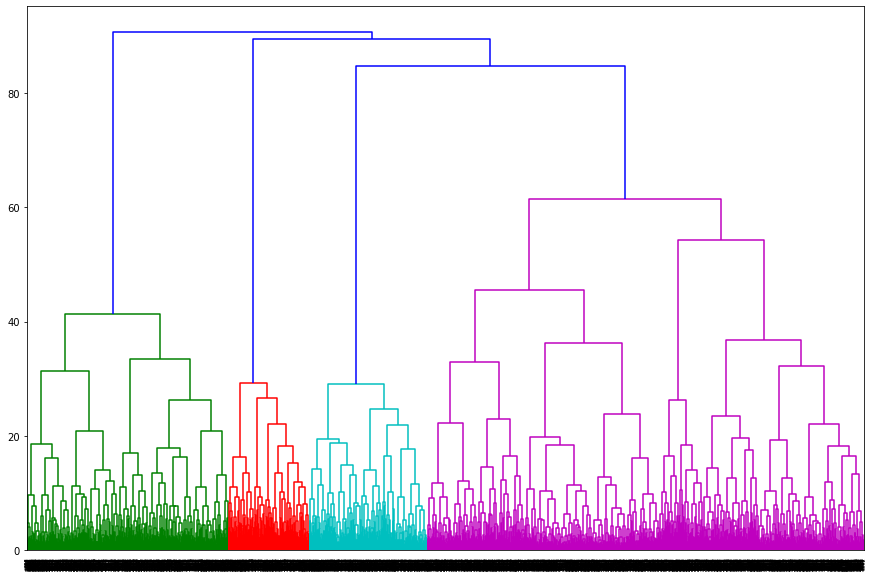

In [15]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

scaler = StandardScaler() 
x_sc = scaler.fit_transform(gym_ml.drop('churn', axis=1))

linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Дендрограмма предлагает выделить 4 кластера пользователей, но в дальнейшем мы используем 5 кластеров. 

Обучим модель кластеризации на основании алгоритма K-Means.

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, random_state=42)
labels = km.fit_predict(x_sc)
gym_ml['cluster'] = labels
gym_ml.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,
0,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
1,0.499104,1.000000,0.198029,0.064516,1.0,1.956093,0.305556,27.754480,122.636842,1.969534,1.248856,0.536738
2,0.497980,0.995960,0.892929,1.000000,1.0,6.887879,0.522222,29.578788,153.072223,4.257576,1.912915,0.124242
3,0.536842,0.995789,0.407368,0.010526,1.0,6.534737,0.522105,30.703158,175.989644,5.584211,2.341094,0.011579
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


Высокие значения среднего в стоблце `'churn'` соответствуют низким показателям по признакам: `'lifetime'`, `'contract_period'`, `'group_visits'`, `'avg_class_frequency_current_month'`.

Изучим распределения признаков для кластеров:

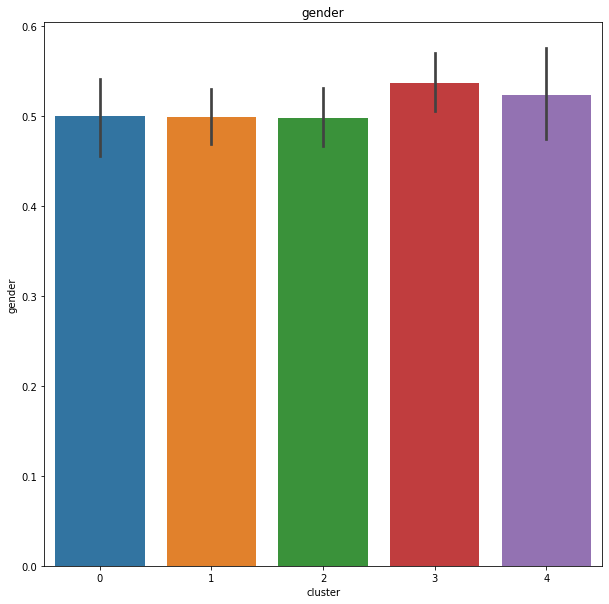

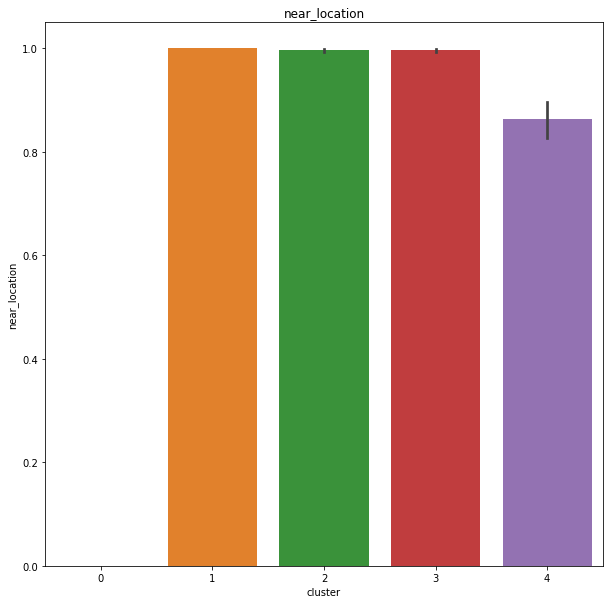

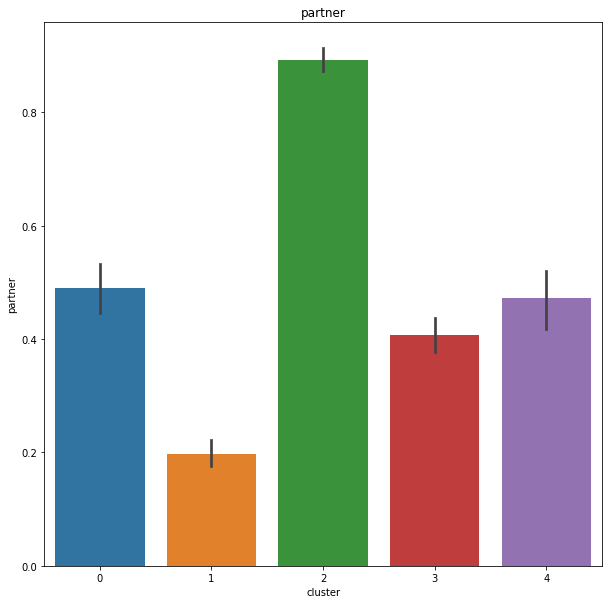

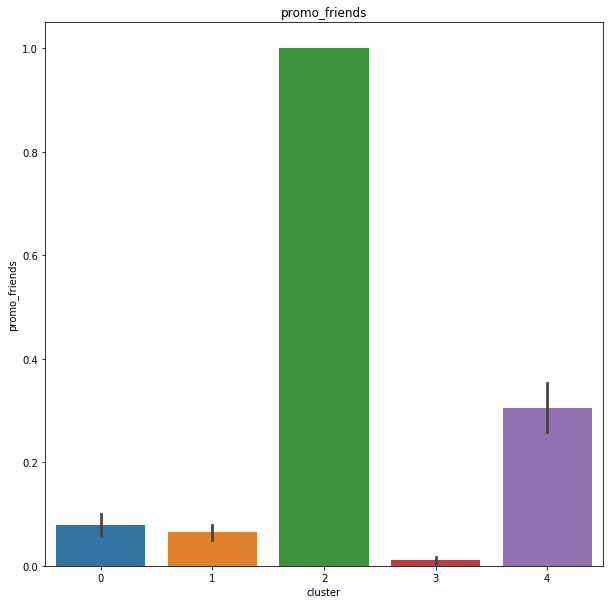

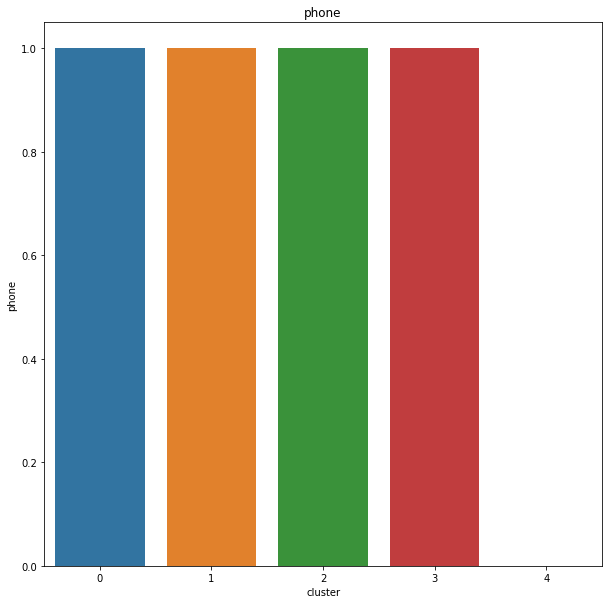

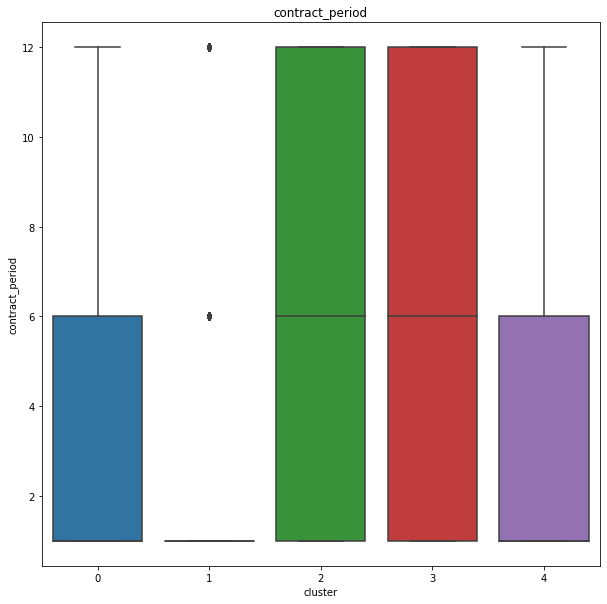

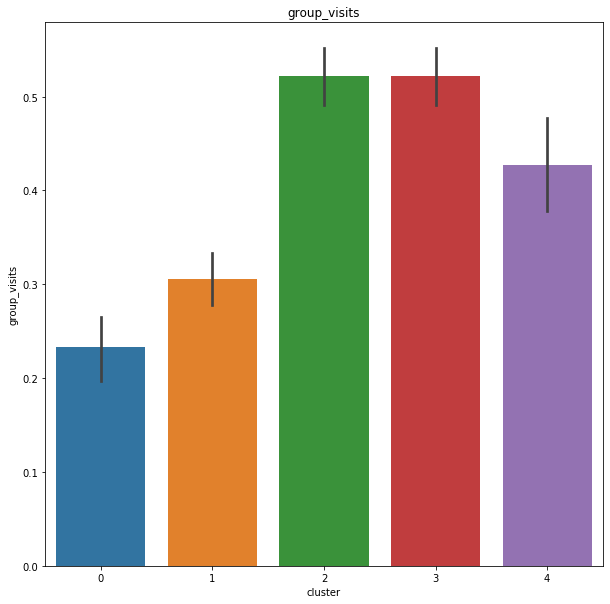

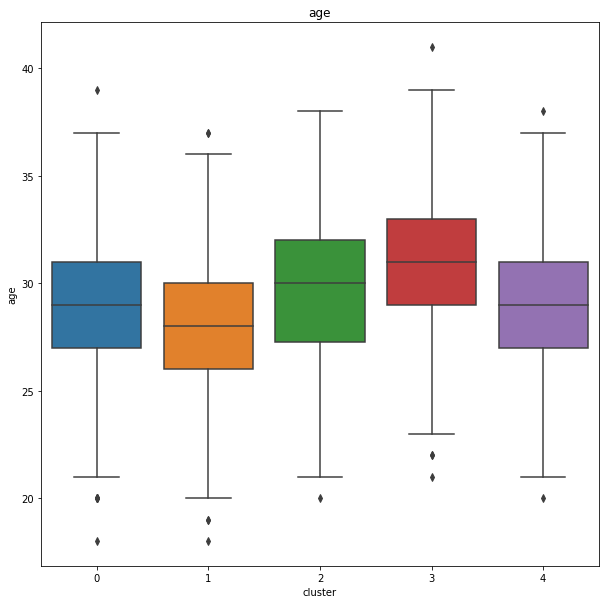

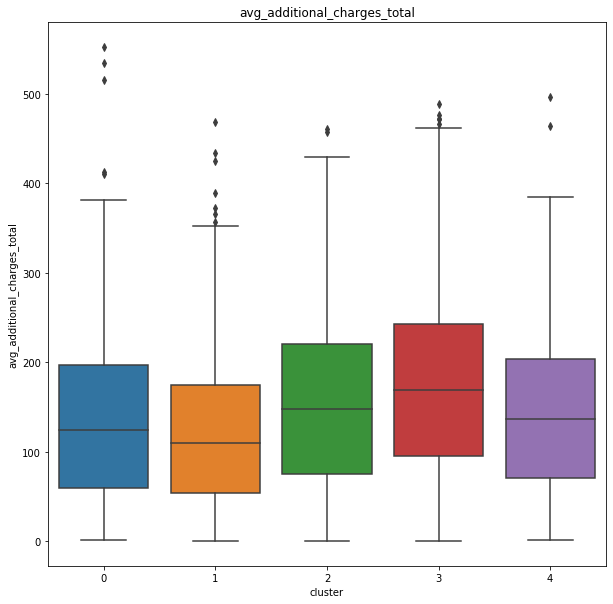

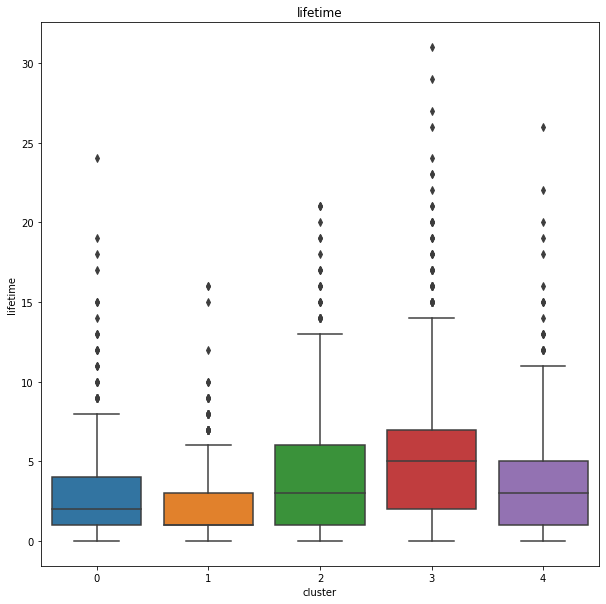

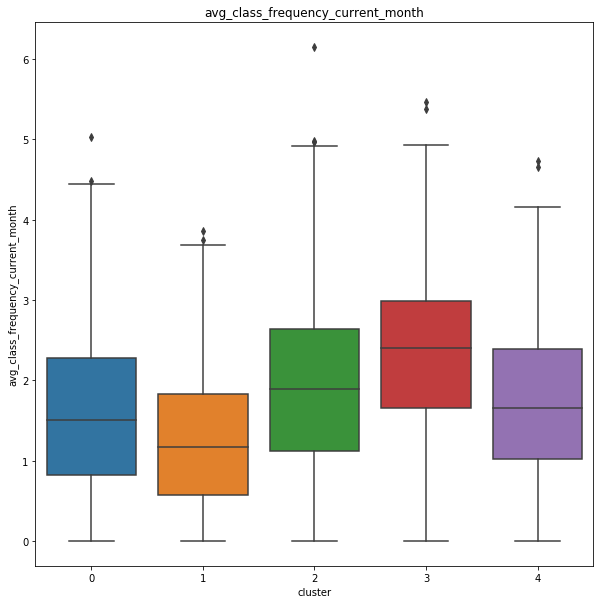

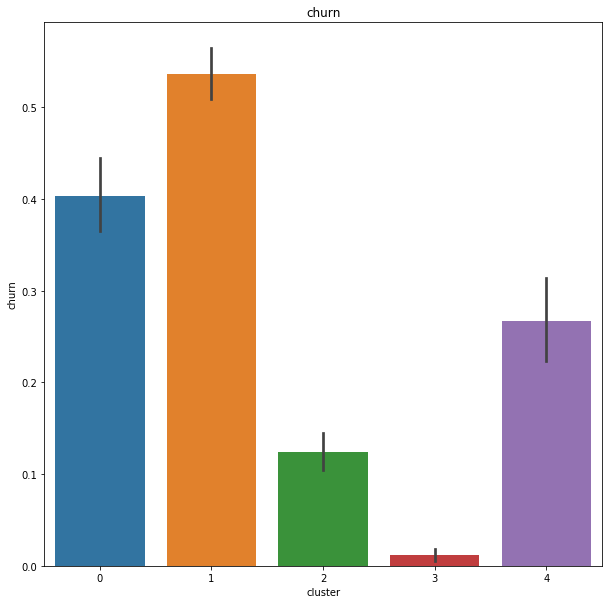

In [17]:
def show_bars_for_clusters_on_plot(df, cluster_name, y_name):
    plt.figure(figsize = (10,10))
    sns.barplot(df[cluster_name], df[y_name])
    plt.title('{}'.format(y_name))
    plt.show()
    
def show_box_for_clusters_on_plot(df, cluster_name, y_name):
    plt.figure(figsize = (10,10))
    sns.boxplot(df[cluster_name], df[y_name])
    plt.title('{}'.format(y_name))
    plt.show()

non_binary = ['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month']
for col in gym_ml.drop('cluster', axis = 1).columns:
    if col in non_binary:
        show_box_for_clusters_on_plot(gym_ml, 'cluster', col)
    else:
        show_bars_for_clusters_on_plot(gym_ml, 'cluster', col)
            


У нас получилось 5 групп пользователей. 

Надежные -  
- Кластер 1 с минимальным оттоком: 
   
Представители обоих полов, которые преимущественно являются сотрудниками компании-партнёра клуба. Проживают или работают в районе расположения клуба. Более 60% из них использовали промокод, есть телефон.  У них самые длительные абонементы (от 6 о 12 мес). Лучше всех посещают групповые занятия (более 60%), у них самый высокий средний возраст (30 лет), больше всех покупают дополнительные услуги (медиана 175). Самые постоянные клиенты: жизненный цикл 4 месяца по медиане. Ходят чаще всех - в среднем не менее 1.5 и больше раз в неделю, медиана больше 2. 

Для остальных доля оттока составляет от 26% до 40%. Опишу их в порядке убывания надежности.
- Кластер 3 - 26,7%:

Представители обоих полов, большая часть которых проживают или работают в районе расположения клуба. Половина из них сотрудники компании-партнёра клуба. Менее 10% из них использовали промокод, есть телефон. Абонементы от 1 до 6 мес. Более 40% из них  посещают групповые занятия, средний возраст 29 лет, дополнительные услуги покупают средне: на уровне 120 по медиане. Жизненный цикл около 3 мес. по медиане. Ходят 1-1,5 раз в неделю в среднем. 

- Кластер 2 - 33,2%:

Представители обоих полов (женщин незначительно больше), которые проживают или работают в районе расположения клуба. Не являются  сотрудниками компании-партнёра клуба обоих полов. Около 30% из них использовали промокод, телефона нет. Абонементы от 1 до 6 мес. 40% из них  посещают групповые занятия, средний возраст 29 лет, дополнительные услуги покупают средне: на уровне 120 по медиане. Жизненный цикл около 2 мес. по медиане. Ходят 1-1,5 раз в неделю в среднем. 

- Кластер 4 - 37,3%:

Представители обоих полов, которые проживают или работают в районе расположения клуба. Почти все из них сотрудники компании-партнёра клуба. Более 55% из них использовали промокод, есть телефон. Абонементы от 1 до 6 мес. Плохо посещают групповые занятия, на уровне 25%. Самая молодая группа - средний возраст 27 лет, дополнительные услуги покупают хуже всех: на уровне 110 по медиане. Жизненный цикл маленький, около 2 мес. по медиане. Ходят реже всех, в среднем 1,2 раза в неделю. 

- Кластер 0 - 40,2%:

Представители обоих полов, которые не проживают в районе расположения клуба. Половина из них сотрудники компании-партнёра клуба. Более 55% из них использовали промокод, есть телефон. Абонементы от 1 до 6 мес. Хуже всех посещают групповые занятия, чуть более 20%. Средний возраст 29 лет, дополнительные услуги покупают плохо: на уровне 110 по медиане. Жизненный цикл маленький, около 2 мес. по медиане. Ходят в среднем 1,5 раза в неделю.


Получается, что самые устойчивые клиенты – 30-ти летние замотивированные спортсмены, которые живут или работают рядом с клубом, покупают длительные абонементы и с удовольствием ходят на групповые занятия. Они посещают клуб 2 – 3 раза в неделю и готовы раскошелиться на дополнительные услуги.  

Красные флажки: клиент не живет/работает рядом с клубом, плохо посещает групповые занятия и вообще редко ходит, возраст мене 27 лет. 


Посмотрим процент оттока по кластерам:

In [18]:
gym_ml.groupby('cluster')['churn'].mean()

cluster
0    0.403226
1    0.536738
2    0.124242
3    0.011579
4    0.266839
Name: churn, dtype: float64

Кластер №1 с практически нулевым процентом, №3 с 26.7%, №2 - 33,2%, №4 - 37,3%, максимальный отток в кластере №0 с 40%. 

<div id='step6'/>

## Общие выводы и рекомендации:

#### Задача:
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток. 

#### Цель:
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - выделить целевые группы клиентов;
    - предложить меры по снижению оттока;
    - определить другие особенности взаимодействия с клиентами.

В начале работы я подготовила данные: убедилась в том, что в данных нет пропусков, привела названия колонок к нижнему регистру. 

### Исследовательский анализ данных (EDA)

В признаках есть много бинарных значений, но часть признаков количественная. Поэтому в общем средние значения признаков сильно различаются. Возможно, данные нужно будет стандартизировать.

По получившимся средним значениям кажется, будто у пользователей со значением 'churn' == 1 они ниже, чем у тех, чей 'churn' == 0.

Я создала два массива данных, разделенных по ключевому признаку `'churn'`: пользователи, которые оттекли, и те, которые остались. 
Исходя из графиков, видно, что самые большие различия между группами видны в таких признаках, как `'contract_period'`, `'group_visits'`, `'avg_additional_charges_total'`, `'month_to_end_contract'`, `'lifetime'`, `'avg_class_frequency_total'`, `'avg_class_frequency_current_month'`. То есть чаще всего оттекают те, кто покупает короткие абонементы, является новым клиентом; те кто вообще ходит раз через раз и особенно халтурили в текущем месяце и те, кто редко посещает групповые занятия.

На графиках распределения по признакам для всех данных по исходной таблице `gym` видно, что наши группы различаются по возрасту: `'churn == 1'` это 25-30, `'churn == 0'` - 25-35. В нулевой группе больше абонементов длительностью от 6, 10, 12 месяцев, а в другой - на 1 и 6 месяцев. `'lifetime'` для `'churn == 1'` почти не превышает 3х месяцев, в `'churn == 0'` этот показатель уверенно доходит до 10 месяцев и выше. Кроме того группы сильно отличаются по посещению и сумме дополнительных расходов. Те, кто отваливается, ходят и платят значительно меньше.

На тепловой карте видно, что есть несколько признаков чрезмерно сильно коррелирующих друг с другом - это `'contract_period'` и `'month_to_end_contract'`, `'avg_class_frequency_current_month'` и `'avg_class_frequency_total'`. Поскольку для линейных моделей взаимная корреляция нежелательна, нужно удалить по одному из пары признаков. 
`'contract_period'` - важная фича, ее нужно обязательно оставить. Во второй паре, судя по графику, нет сильной разницы между признаками. Я удалила `'month_to_end_contract'` и `'avg_class_frequency_current_month'`.

### Модель прогнозирования оттока пользователей

Я использовала два алгоритма: логистической регрессии и случайный лес. Затем я оценила метрики accuracy, precision и recall для обеих моделей на валидационной выборке. 

Метрики для модели логистической регрессии:
- Accuracy: 0.89
- Precision: 0.78
- Recall: 0.75

Метрики для модели случайного леса:
- Accuracy: 0.89
- Precision: 0.81
- Recall: 0.75

Модель `RandomForestClassifier` показала себя чуть точнее по метрике `Precision` - 0.83. Но у логистической регрессии выше `Recall` - 0.77. 

### Кластеризация пользователей

  
Моя дендрограмма предлагает выделить 4 кластера пользователей, но в дальнейшем мы будем использовать 5 кластеров, по которым я 
вывела средние значения признаков. 
Высокие значения среднего в столбце `'churn'` соответствуют низким показателям по признакам: `'lifetime'`, `'contract_period'`, `'group_visits'`, `'avg_class_frequency_total'`.

Высокое среднее значение `'churn'` гворит о низкой надежности кластеров №1 (57% оттока) и №0 (40%). Они больше всего склонны к оттоку. 
Самый надежный - кластер №3 (1% оттока), потом №2 (12%) и №4 (27%).

### Вывод:

У нас получилось 5 групп пользователей.

Надежные -

- Кластер 1 с минимальным оттоком:

Представители обоих полов, которые преимущественно являются сотрудниками компании-партнёра клуба. Проживают или работают в районе расположения клуба. Более 60% из них использовали промокод, есть телефон. У них самые длительные абонементы (от 6 о 12 мес). Лучше всех посещают групповые занятия (более 60%), у них самый высокий средний возраст (30 лет), больше всех покупают дополнительные услуги (медиана 175). Самые постоянные клиенты: жизненный цикл 4 месяца по медиане. Ходят чаще всех - в среднем не менее 1.5 и больше раз в неделю, медиана больше 2.

Для остальных доля оттока составляет от 26% до 40%. Опишу их в порядке убывания надежности.

- Кластер 3 - 26,7%:

Представители обоих полов, большая часть которых проживают или работают в районе расположения клуба. Половина из них сотрудники компании-партнёра клуба. Менее 10% из них использовали промокод, есть телефон. Абонементы от 1 до 6 мес. Более 40% из них посещают групповые занятия, средний возраст 29 лет, дополнительные услуги покупают средне: на уровне 120 по медиане. Жизненный цикл около 3 мес. по медиане. Ходят 1-1,5 раз в неделю в среднем.

- Кластер 2 - 33,2%:

Представители обоих полов (женщин незначительно больше), которые проживают или работают в районе расположения клуба. Не являются сотрудниками компании-партнёра клуба обоих полов. Около 30% из них использовали промокод, телефона нет. Абонементы от 1 до 6 мес. 40% из них посещают групповые занятия, средний возраст 29 лет, дополнительные услуги покупают средне: на уровне 120 по медиане. Жизненный цикл около 2 мес. по медиане. Ходят 1-1,5 раз в неделю в среднем.

- Кластер 4 - 37,3%:

Представители обоих полов, которые проживают или работают в районе расположения клуба. Почти все из них сотрудники компании-партнёра клуба. Более 55% из них использовали промокод, есть телефон. Абонементы от 1 до 6 мес. Плохо посещают групповые занятия, на уровне 25%. Самая молодая группа - средний возраст 27 лет, дополнительные услуги покупают хуже всех: на уровне 110 по медиане. Жизненный цикл маленький, около 2 мес. по медиане. Ходят реже всех, в среднем 1,2 раза в неделю.

- Кластер 0 - 40,2%:

Представители обоих полов, которые не проживают в районе расположения клуба. Половина из них сотрудники компании-партнёра клуба. Более 55% из них использовали промокод, есть телефон. Абонементы от 1 до 6 мес. Хуже всех посещают групповые занятия, чуть более 20%. Средний возраст 29 лет, дополнительные услуги покупают плохо: на уровне 110 по медиане. Жизненный цикл маленький, около 2 мес. по медиане. Ходят в среднем 1,5 раза в неделю.

Получается, что самые устойчивые клиенты – 30-ти летние замотивированные спортсмены, которые живут или работают рядом с клубом, покупают длительные абонементы и с удовольствием ходят на групповые занятия. Они посещают клуб 2 – 3 раза в неделю и готовы раскошелиться на дополнительные услуги.

Основные признаки, влияющие на отток клиентов – это длительность абонемента, средняя частота посещений в неделю и толерантность к групповым занятиям. Чем выше показатели этих признаков, тем мотивированнее клиент и тем ниже шансы оттока. Важный признак - место работы/проживания. У кластера 0, в который вошли те, кто не работает/живет рядом с клубом, самый высокий 'churn'.

Для того, чтобы снизить показатель оттока (например, в группах 3, 2, и 4) нужно повысить количество еженедельных посещений зала и пробудить интерес к групповым занятиям. Возможно, стоит провести опрос среди клиентов из этих групп, чтобы узнать, как можно разнообразить групповые тренировки или провести внутриклубные соревнования с интенсивной подготовкой в группах. Главное, сделать так, чтобы люди начали ходить чаще и регулярнее.

Для клиентов из кластера 2 необходимо узнать телефон, чтобы повысить качество клиентского сервиса. 

